# Numerical Differentiation

Let's start with an analytic function we can solve exactly as we did with integration to see some limit.

We'll use a relatively trivial function, $f(x) = 2 x^2$. We can immediately write $f'(x) = 4 x$.

Let's calculate a derivative at $x = 2$ and $x = 100$ using the forward or backward difference method. Section 5.10.2 suggests we can use a step size on the order of $h \approx 10^{-8}$. Try at least three different step sizes of varying orders of magnitude. How does each compare to the known correct value?

Repeat the exercise using the central difference method. You should find it is noticably more accurate. If it isn't obvious, try a larger (i.e. purposefully less precise) step size.

In [16]:
def function(x):
    return 2*x**2

def deriv(function,x,step_power,type="Forward"):
    step_size = 10**(step_power)
    if type == "Forward":
        return (function(x+step_size)-function(x))/step_size
    elif type == "Backward":
        return (function(x)-function(x-step_size))/step_size
    else: #This is central
        return (function(x+step_size/2)-function(x-step_size/2))/step_size
print("Forward:")
print(deriv(function,2,-8,"Forward"))
print(deriv(function,100,-8,"Forward"))

print("Backward:")
print(deriv(function,2,-8,"Backward"))
print(deriv(function,100,-8,"Backward"))

print("Central:")
print(deriv(function,2,-8,"Central"))
print(deriv(function,100,-8,"Central"))

Forward:
7.999999951380232
399.99977161642164
Backward:
7.999999951380232
399.99977161642164
Central:
7.999999951380232
400.00013541430235


## Discrete data points

As we saw with integrals, real data doesn't come as a smooth function we can evaluate anywhere. To save you the headache of reading in a file, we'll create our own fake data. The code below creates an array x, sampled at an interval of 0.1, and an array y, the output of our previous $f(x)$. 

Again, evaluate the derivative at $x = 2$ and $x = 100$. 

Hint: find the documentation on the numpy function argmin

In [44]:
import numpy as np

x = np.arange(0, 110, 0.1)
y = np.array([2 * i**2 for i in x])

def search(value,array):
    index = np.argmin(np.abs(array-value))
    return index
    
def discrete_deriv(value,x_array,y_array,type="Forward"):
    index = search(value,x_array)
    if type == "Forward":
        step_size = x_array[index+1]-x_array[index]
        return (y_array[index+1]-y_array[index])/step_size
    elif type == "Backward":
        step_size = x_array[index]-x_array[index-1]
        return (y_array[index]-y_array[index-1])/step_size
    else: # "Central" like:
        step_size = x_array[index+1]-x_array[index-1]
        return y_array[index+1]-y_array[index-1]/step_size
        

discrete_deriv(2,x,y,"Central")

8.199999999999996

Create a new discrete dataset with x sampled at an interval of 0.001 and repeat the exercise. The results should not be surprising, but the exercise is worth doing.

In [53]:
#import numpy as np

x = np.arange(0, 110, 0.001)
y = np.array([2 * i**2 for i in x])

def search(value,array):
    index = np.argmin(np.abs(array-value))
    return index
    
def discrete_deriv(value,x_array,y_array,type="Forward"):
    index = search(value,x_array)
    if type == "Forward":
        step_size = x_array[index+1]-x_array[index]
        return (y_array[index+1]-y_array[index])/step_size
    elif type == "Backward":
        step_size = x_array[index]-x_array[index-1]
        return (y_array[index]-y_array[index-1])/step_size
    else: # "Central" like:
        step_size = x_array[index+1]-x_array[index-1]
        return y_array[index+1]-y_array[index-1]/step_size
        

discrete_deriv(2,x,y,"Forward")

8.00200000000028

## Noisy discrete data

Section 5.10.7 briefly discusses derivatives of noisy data. Unfortunately there isn't a lot of discussion; one could imagine plenty of scenarios where you might want to calculate a derivative from noisy data, e.g. monitoring trends in a data stream from an instrument, or sometimes the derivative of a measurement is interesting in its own right.

Since the derivative is simply $\frac{dy}{dx}$, one can calculate a derivative over time by plotting $\frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}$. Use this method to plot the derivative of the discrete dataset you created above. Not surprisingly you should find a very straight line.

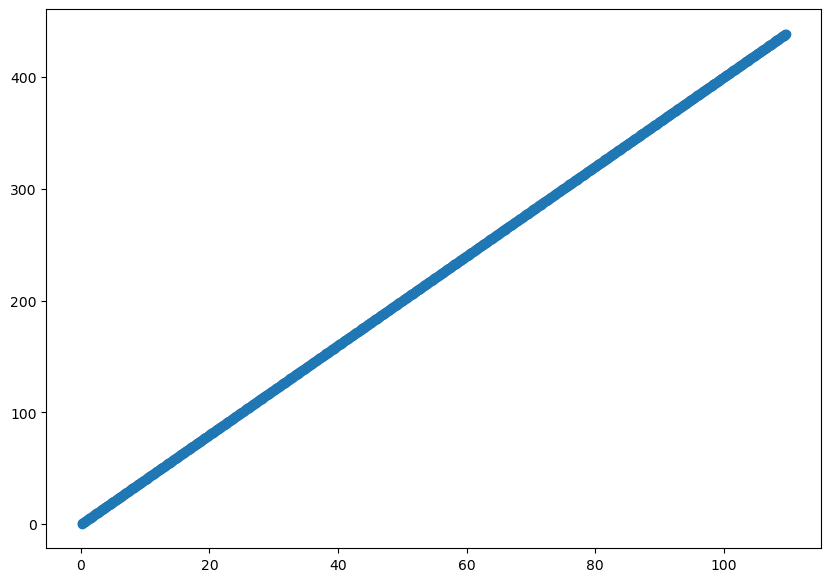

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0, 110, 0.1)
y = np.array([2 * i**2 for i in x])

def search(value,array):
    index = np.argmin(np.abs(array-value))
    return index
    
def discrete_deriv(value,x_array,y_array,type="Forward"):
    index = search(value,x_array)
    if type == "Forward":
        step_size = x_array[index+1]-x_array[index]
        return (y_array[index+1]-y_array[index])/step_size
    elif type == "Backward":
        step_size = x_array[index]-x_array[index-1]
        return (y_array[index]-y_array[index-1])/step_size
    else: # "Central" like:
        step_size = x_array[index+1]-x_array[index-1]
        return (y_array[index+1]-y_array[index-1])/step_size


# He used a new x plot when generating the y array due to index bounds.

x_plot = x[1:-2]
#print(x_plot)
deriv_array = []
for i in range(0,len(x_plot)):
    deriv_array.append(discrete_deriv(x_plot[i],x,y,"Central")) 
# Why do we use x_plot[i]? Well, if we used i, we run out too fast, since i increments by 1 while x plot goes by 0.1 or smth. Since we want to make
# sure we do what we want, x_plot[i] is what we want.


fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
graph.scatter(x_plot,deriv_array)

Now let's create a noisy version of our function. Calculate the running $\frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}$ derivative for this noisy data and plot the result (plot $x$ vs $f'(x)$).

Not surprisingly, it's a bit terrible. The step size is small compared to the error we applied, so we're dividing "noise" by a small decimal, making it noisier.

There are a few solutions given in Section 5.10.7. A simple solution is to sample over a wider range of data points, so rather than using the smallest possible $dx$, choose a $dx$ more appropriate for the data. Note $dx$ will be a number, not a number of points, but you will need to determine a translation between your more appropriately sized $dx$ and your data.

In the previous plots, we have not carefully defined the relationship between $x$, $f(x)$ and $f'(x)$. Now that you are using non-adjacent points to calculate a derivative at $x$, you should put some thought into what computed derivative matches which $x$. There are more correct and less correct answers here, but at a minimum you will have to change the size of $x$ because your derivative array/list will have fewer points than $x$.

If you're inclined, write a loop that tests different values. It's not a lot of work and the series of plots is quite satisfying.

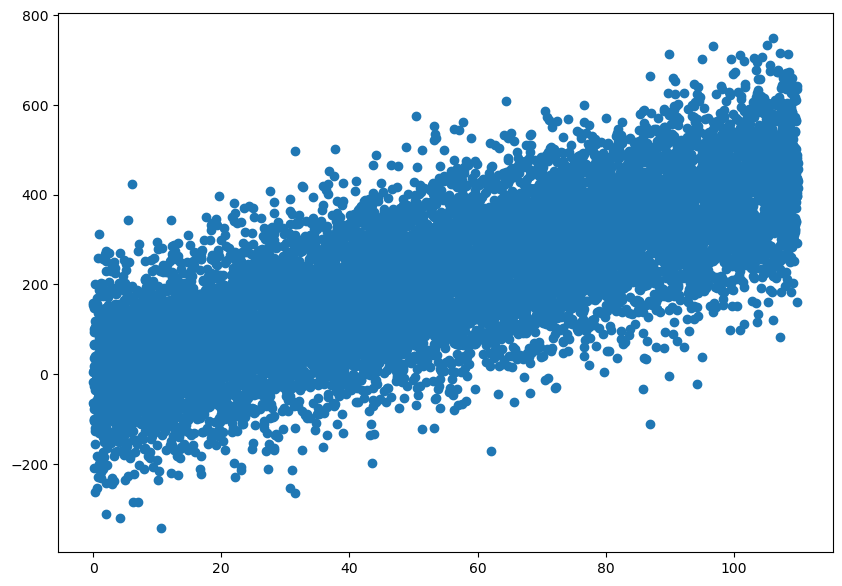

In [17]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0, 110, 0.01)
y = np.array([2 * i**2 for i in x])
noise = np.random.randn(len(x)) * 1.5
noisy = y + noise

def search(value,array):
    index = np.argmin(np.abs(array-value))
    return index
    
def discrete_deriv(value,x_array,y_array,type="Forward"):
    index = search(value,x_array)
    if type == "Forward":
        step_size = x_array[index+1]-x_array[index]
        return (y_array[index+1]-y_array[index])/step_size
    elif type == "Backward":
        step_size = x_array[index]-x_array[index-1]
        return (y_array[index]-y_array[index-1])/step_size
    else: # "Central" like:
        step_size = x_array[index+1]-x_array[index-1]
        numerator = y_array[index+1]-y_array[index-1]
        return numerator/step_size

x_plot = x[1:-2]
deriv_array = []
for i in range(0,len(x_plot)):
    deriv_array.append(discrete_deriv(x_plot[i],x,noisy,"Central"))
    
fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
graph.scatter(x_plot,deriv_array)

In [29]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0, 110, 0.01)
y = np.array([2 * i**2 for i in x])
noise = np.random.randn(len(x)) * 1.5
noisy = y + noise

def search(value,array):
    index = np.argmin(np.abs(array-value))
    return index

def adj_search(value,x_array,step_power):
    index = search(value,x_array)
    delta = 10**(step_power)
    adjust = 1
    step_size = x_array[index+adjust]-x_array[index-adjust]
    while step_size > delta:
        adjust +=1
        step_size = x_array[index+adjust]-x_array[index-adjust]
    return adjust


def adj_dis_deriv(value,x_array,y_array,step_power):
    index = search(value,x_array)
    adjust = adj_search(value,x_array,step_power)
    step_size = x_array[index+adjust]-x_array[index-adjust]
    numerator = y_array[index+adjust]-y_array[index-adjust] 
    return numerator / step_size


x_plot = x[1:-2]
deriv_array = []
for i in range(0,len(x_plot)):
    deriv_array.append(discrete_deriv(x_plot[i],x,noisy,"Central"))
    
fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
graph.scatter(x_plot,deriv_array)

259.9962035266234

### If you have extra time

The other method suggested in the text for finding a derivative is fitting a function to the data and using that function with a forward/backward or central difference method to find a derivative.

In this case, we've cheated a bit and already know the form for the function we want to fit. But also it's fairly obvious that the data follow a polynomial form. You can leverage the numpy functionality polyfit to solve the problem, and combine it with poly1d to quickly obtain a callable function you can use for your derivative.

Evaluate the derivative at a few points. How does the accuracy compare to other methods?

In [ ]:
# code